# Hands-on Activity 1.3 | Transportation using Graphs

#### Objective(s):

This activity aims to demonstrate how to solve transportation related problem using Graphs

#### Intended Learning Outcomes (ILOs):
* Demonstrate how to compute the shortest path from source to destination using graphs
* Apply DFS and BFS to compute the shortest path

#### Resources:
* Jupyter Notebook

#### Procedures:

1. Create a Node class

In [ ]:
class Node(object):
    def __init__(self, name):
        """Assumes name is a string"""
        self.name = name
    def getName(self):
        return self.name
    def __str__(self):
        return self.name

2. Create an Edge class

In [ ]:
class Edge(object):
    def __init__(self, src, dest):
        """Assumes src and dest are nodes"""
        self.src = src
        self.dest = dest
    def getSource(self):
        return self.src
    def getDestination(self):
        return self.dest
    def __str__(self):
        return self.src.getName() + '->' + self.dest.getName()

3. Create Digraph class that add nodes and edges

In [ ]:
class Digraph(object):
    """edges is a dict mapping each node to a list of
    its children"""
    def __init__(self):
        self.edges = {}
    def addNode(self, node):
        if node in self.edges:
            raise ValueError('Duplicate node')
        else:
            self.edges[node] = []
    def addEdge(self, edge):
        src = edge.getSource()
        dest = edge.getDestination()
        if not (src in self.edges and dest in self.edges):
            raise ValueError('Node not in graph')
        self.edges[src].append(dest)
    def childrenOf(self, node):
        return self.edges[node]
    def hasNode(self, node):
        return node in self.edges
    def getNode(self, name):
        for n in self.edges:
            if n.getName() == name:
                return n
        raise NameError(name)
    def __str__(self):
        result = ''
        for src in self.edges:
            for dest in self.edges[src]:
                result = result + src.getName() + '->'\
                         + dest.getName() + '\n'
        return result[:-1] #omit final newline

4. Create a Graph class from Digraph class that deifnes the destination and Source

In [ ]:
class Graph(Digraph):
    def addEdge(self, edge):
        Digraph.addEdge(self, edge)
        rev = Edge(edge.getDestination(), edge.getSource())
        Digraph.addEdge(self, rev)

5. Create a buildCityGraph method to add nodes (City) and edges   (source to destination)

In [ ]:
def buildCityGraph(graphType):
    g = graphType()
    for name in ('Boston', 'Providence', 'New York', 'Chicago', 'Denver', 'Phoenix', 'Los Angeles'):
        #Create 7 nodes
        g.addNode(Node(name))
    g.addEdge(Edge(g.getNode('Boston'), g.getNode('Providence')))
    g.addEdge(Edge(g.getNode('Boston'), g.getNode('New York')))
    g.addEdge(Edge(g.getNode('Providence'), g.getNode('Boston')))
    g.addEdge(Edge(g.getNode('Providence'), g.getNode('New York')))
    g.addEdge(Edge(g.getNode('New York'), g.getNode('Chicago')))
    g.addEdge(Edge(g.getNode('Chicago'), g.getNode('Denver')))
    g.addEdge(Edge(g.getNode('Denver'), g.getNode('Phoenix')))
    g.addEdge(Edge(g.getNode('Denver'), g.getNode('New York')))
    g.addEdge(Edge(g.getNode('Los Angeles'), g.getNode('Boston')))
    return g

In [ ]:
def printPath(path):
    """Assumes path is a list of nodes"""
    result = ''
    for i in range(len(path)):
        result = result + str(path[i])
        if i != len(path) - 1:
            result = result + '->'
    return result

6. Create a method to define DFS technique

In [ ]:
def DFS(graph, start, end, path, shortest, toPrint = False):
    """Assumes graph is a Digraph; start and end are nodes;
          path and shortest are lists of nodes
       Returns a shortest path from start to end in graph"""
    path = path + [start]
    if toPrint:
        print('Current DFS path:', printPath(path))
    if start == end:
        return path
    for node in graph.childrenOf(start):
        if node not in path: #avoid cycles
            if shortest == None or len(path) < len(shortest):
                newPath = DFS(graph, node, end, path, shortest,
                              toPrint)
                if newPath != None:
                    shortest = newPath
        elif toPrint:
            print('Already visited', node)
    return shortest

7. Define a shortestPath method to return the shortest path from source to destination using DFS

In [ ]:
def shortestPath(graph, start, end, toPrint = False):
    """Assumes graph is a Digraph; start and end are nodes
       Returns a shortest path from start to end in graph"""
    return DFS(graph, start, end, [], None, toPrint)

8. Create a method to test the shortest path method

In [ ]:
def testSP(source, destination):
    g = buildCityGraph(Digraph)
    sp = shortestPath(g, g.getNode(source), g.getNode(destination),
                      toPrint = True)
    if sp != None:
        print('Shortest path from', source, 'to',
              destination, 'is', printPath(sp))
    else:
        print('There is no path from', source, 'to', destination)

9. Execute the testSP method

In [ ]:
testSP('Boston', 'Phoenix')

Current DFS path: Boston
Current DFS path: Boston->Providence
Already visited Boston
Current DFS path: Boston->Providence->New York
Current DFS path: Boston->Providence->New York->Chicago
Current DFS path: Boston->Providence->New York->Chicago->Denver
Current DFS path: Boston->Providence->New York->Chicago->Denver->Phoenix
Already visited New York
Current DFS path: Boston->New York
Current DFS path: Boston->New York->Chicago
Current DFS path: Boston->New York->Chicago->Denver
Current DFS path: Boston->New York->Chicago->Denver->Phoenix
Already visited New York
Shortest path from Boston to Phoenix is Boston->New York->Chicago->Denver->Phoenix


##### Question:
    
Describe the DFS method to compute for the shortest path using the given sample codes

explores paths before backtracking to explore other paths and its not necessarily find the shortest path, and the path length is determined by the number of nodes visited.

#type your answer here

10. Create a method to define BFS technique

In [ ]:
def BFS(graph, start, end, toPrint = False):
    """Assumes graph is a Digraph; start and end are nodes
       Returns a shortest path from start to end in graph"""
    initPath = [start]
    pathQueue = [initPath]
    while len(pathQueue) != 0:
        #Get and remove oldest element in pathQueue
        tmpPath = pathQueue.pop(0)
        if toPrint:
            print('Current BFS path:', printPath(tmpPath))
        lastNode = tmpPath[-1]
        if lastNode == end:
            return tmpPath
        for nextNode in graph.childrenOf(lastNode):
            if nextNode not in tmpPath:
                newPath = tmpPath + [nextNode]
                pathQueue.append(newPath)
    return None

11. Define a shortestPath method to return the shortest path from source to destination using DFS

In [ ]:
def shortestPath(graph, start, end, toPrint = False):
    """Assumes graph is a Digraph; start and end are nodes
       Returns a shortest path from start to end in graph"""
    return BFS(graph, start, end, toPrint)

12. Execute the testSP method

In [ ]:
testSP('Boston', 'Phoenix')

Current BFS path: Boston
Current BFS path: Boston->Providence
Current BFS path: Boston->New York
Current BFS path: Boston->Providence->New York
Current BFS path: Boston->New York->Chicago
Current BFS path: Boston->Providence->New York->Chicago
Current BFS path: Boston->New York->Chicago->Denver
Current BFS path: Boston->Providence->New York->Chicago->Denver
Current BFS path: Boston->New York->Chicago->Denver->Phoenix
Shortest path from Boston to Phoenix is Boston->New York->Chicago->Denver->Phoenix


#### Question:
    
Describe the BFS method to compute for the shortest path using the given sample codestion:
    explores all possible paths in a BFS method, guaranteeing that the first path found from start to end is the shortest.

#### Supplementary Activitiy
* Use a specific location or city to solve transportation using graph
* Use DFS and BFS methods to compute the shortest path
* Display the shortest path from source to destination using DFS and BFS
* Differentiate the performance of DFS from BFS

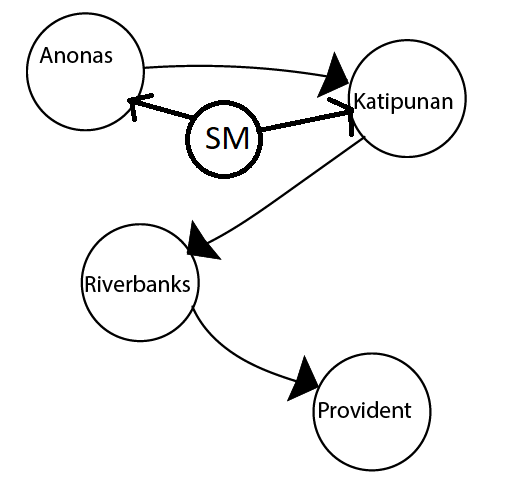

In [ ]:
#BFS

class Node(object):
    def __init__(self, name):
        self.name = name  #Initialize the name of the node

    def getName(self):
        return self.name  #Get the name of the node

    def __str__(self):
        return self.name  #Return the name when the object is converted to a string

class Edge(object):
    def __init__(self, src, dest):
        self.src = src  #Initialize the source node of the edge
        self.dest = dest  #Initialize the destination node of the edge

    def getSource(self):
        return self.src  #Get the source node of the edge

    def getDestination(self):
        return self.dest  #Get the destination node of the edge

    def __str__(self):
        return self.src.getName() + '->' + self.dest.getName()  #Return a string representation of the edge

class Digraph(object):
    def __init__(self):
        self.edges = {}  #Initialize the edges dictionary

    def addNode(self, node):
        if node in self.edges:
            raise ValueError('Duplicate node')  #Check if the node already exists
        else:
            self.edges[node] = []  #Add the node to the dictionary with an empty list of edges

    def addEdge(self, edge):
        src = edge.getSource()  #Get the source node of the edge
        dest = edge.getDestination()  #Get the destination node of the edge
        if not (src in self.edges and dest in self.edges):
            raise ValueError('Node not in graph')  #Check if both nodes exist in the graph
        self.edges[src].append(dest)  #Add the destination node to the list of edges for the source node

    def childrenOf(self, node):
        return self.edges[node]  #Return the list of children nodes for a given node

    def hasNode(self, node):
        return node in self.edges  #Check if a node exists in the graph

    def getNode(self, name):
        for n in self.edges:
            if n.getName() == name:
                return n  #Return the node with the given name
        raise NameError(name)  #Raise an error if the node is not found

    def __str__(self):
        result = ''
        for src in self.edges:
            for dest in self.edges[src]:
                result = result + src.getName() + '->' + dest.getName() + '\n'  #Return a string representation of the graph
        return result[:-1]  #Omit the final newline

class Graph(Digraph):
    def addEdge(self, edge):
        Digraph.addEdge(self, edge)  #Add an edge to the graph
        rev = Edge(edge.getDestination(), edge.getSource())
        Digraph.addEdge(self, rev)  #Add a reversed edge to the graph

def buildCityGraph(graphType):
    g = graphType()  #Create a new graph
    #Adding nodes
    for name in ('Anonas', 'Katipunan', 'Riverbanks', 'Provident', 'SM'):
        g.addNode(Node(name))  #Add nodes to the graph
    #Adding edges
    g.addEdge(Edge(g.getNode('Anonas'), g.getNode('Katipunan')))
    g.addEdge(Edge(g.getNode('Katipunan'), g.getNode('Riverbanks')))
    g.addEdge(Edge(g.getNode('Riverbanks'), g.getNode('Provident')))
    g.addEdge(Edge(g.getNode('Anonas'), g.getNode('SM')))
    g.addEdge(Edge(g.getNode('SM'), g.getNode('Katipunan')))
    g.addEdge(Edge(g.getNode('Katipunan'), g.getNode('Riverbanks')))
    g.addEdge(Edge(g.getNode('Riverbanks'), g.getNode('Provident')))
    return g  #Return the built graph

def BFS(graph, start, end, toPrint=False):
    initPath = [start]  #Initialize the path with the start node
    pathQueue = [initPath]  #Initialize the queue with the initial path
    while len(pathQueue) != 0:
        tmpPath = pathQueue.pop(0)  #Get the first path from the queue
        if toPrint:
            print('Current BFS path:', '->'.join([node.getName() for node in tmpPath]))  #Print current path if toPrint is True
        lastNode = tmpPath[-1]  #Get the last node of the current path
        if lastNode == end:
            return tmpPath  #Return the path if the last node is the end node
        for nextNode in graph.childrenOf(lastNode):
            if nextNode not in tmpPath:
                newPath = tmpPath + [nextNode]  #Create a new path by appending the next node
                pathQueue.append(newPath)  #Add the new path to the queue
    return None  #Return None if no path is found

def testSP(start, end):
    cityGraph = buildCityGraph(Graph)  #Build the city graph
    startLocation = cityGraph.getNode('Anonas')  #Get the start location node
    endLocation = cityGraph.getNode('Provident')  #Get the end location node
    shortestPath = BFS(cityGraph, startLocation, endLocation, toPrint=True)  #Find the shortest path from start to end
    if shortestPath is not None:
        print('Shortest path from Anonas to Provident:', '->'.join([node.getName() for node in shortestPath]))  #Print the shortest path
    else:
        print('There is no path from Anonas to Provident.')  #Print if there is no path

def shortestPath(graph, start, end, toPrint = False):
    """Assumes graph is a Digraph; start and end are nodes
       Returns a shortest path from start to end in graph"""
    return BFS(graph, start, end, toPrint)  #Find the shortest path in the graph

testSP('Anonas', 'Provident')  #Test the function with start and end points

Current BFS path: Anonas
Current BFS path: Anonas->Katipunan
Current BFS path: Anonas->SM
Current BFS path: Anonas->Katipunan->Riverbanks
Current BFS path: Anonas->Katipunan->SM
Current BFS path: Anonas->Katipunan->Riverbanks
Current BFS path: Anonas->SM->Katipunan
Current BFS path: Anonas->Katipunan->Riverbanks->Provident
Shortest path from Anonas to Provident: Anonas->Katipunan->Riverbanks->Provident


In [ ]:
#DFS

class Node(object):
    def __init__(self, name):
        self.name = name  #Initialize the name of the node

    def getName(self):
        return self.name  #Get the name of the node

    def __str__(self):
        return self.name  #Return the name when the object is converted to a string

class Edge(object):
    def __init__(self, src, dest):
        self.src = src  #Initialize the source node of the edge
        self.dest = dest  #Initialize the destination node of the edge

    def getSource(self):
        return self.src  #Get the source node of the edge

    def getDestination(self):
        return self.dest  #Get the destination node of the edge

    def __str__(self):
        return self.src.getName() + '->' + self.dest.getName()  #Return a string representation of the edge

class Digraph(object):
    def __init__(self):
        self.edges = {}  #Initialize the edges dictionary

    def addNode(self, node):
        if node in self.edges:
            raise ValueError('Duplicate node')  #Check if the node already exists
        else:
            self.edges[node] = []  #Add the node to the dictionary with an empty list of edges

    def addEdge(self, edge):
        src = edge.getSource()  #Get the source node of the edge
        dest = edge.getDestination()  #Get the destination node of the edge
        if not (src in self.edges and dest in self.edges):
            raise ValueError('Node not in graph')  #Check if both nodes exist in the graph
        self.edges[src].append(dest)  #Add the destination node to the list of edges for the source node

    def childrenOf(self, node):
        return self.edges[node]  #Return the list of children nodes for a given node

    def hasNode(self, node):
        return node in self.edges  #Check if a node exists in the graph

    def getNode(self, name):
        for n in self.edges:
            if n.getName() == name:
                return n  #Return the node with the given name
        raise NameError(name)  #Raise an error if the node is not found

    def __str__(self):
        result = ''
        for src in self.edges:
            for dest in self.edges[src]:
                result = result + src.getName() + '->' + dest.getName() + '\n'  #Return a string representation of the graph
        return result[:-1]  #Omit the final newline

class Graph(Digraph):
    def addEdge(self, edge):
        Digraph.addEdge(self, edge)  #Add an edge to the graph
        rev = Edge(edge.getDestination(), edge.getSource())
        Digraph.addEdge(self, rev)  #Add a reversed edge to the graph

def buildCityGraph(graphType):
    g = graphType()  #Create a new graph
    #Adding nodes
    for name in ('Anonas', 'Katipunan', 'Riverbanks', 'Provident', 'SM'):
        g.addNode(Node(name))  #Add nodes to the graph
    #Adding edges
    g.addEdge(Edge(g.getNode('Anonas'), g.getNode('Katipunan')))
    g.addEdge(Edge(g.getNode('Katipunan'), g.getNode('Riverbanks')))
    g.addEdge(Edge(g.getNode('Riverbanks'), g.getNode('Provident')))
    g.addEdge(Edge(g.getNode('Anonas'), g.getNode('SM')))
    g.addEdge(Edge(g.getNode('SM'), g.getNode('Katipunan')))
    g.addEdge(Edge(g.getNode('Katipunan'), g.getNode('Riverbanks')))
    g.addEdge(Edge(g.getNode('Riverbanks'), g.getNode('Provident')))
    return g  #Return the built graph

#Define a Depth-First Search (DFS) function to find the shortest path in a graph
def DFS(graph, start, end, path, shortest, toPrint=False):
    """Assumes graph is a Digraph; start and end are nodes;
          path and shortest are lists of nodes
       Returns a shortest path from start to end in graph"""
    path = path + [start]  #Append the current start node to the path.
    if toPrint:  #If toPrint is True.
        print('Current DFS path:', printPath(path))  #Print the current DFS path.
    if start == end:  #If the start node is equal to the end node.
        return path  #Return the path.
    for node in graph.childrenOf(start):  #Iterate over the children nodes of the current start node in the graph.
        if node not in path:  #If the node is not already in the path (to avoid cycles).
            if shortest == None or len(path) < len(shortest):  #If shortest is None or the current path is shorter than the shortest path.
                newPath = DFS(graph, node, end, path, shortest, toPrint)  #Recursively call DFS with the new node.
                if newPath != None:  #If a new path is found.
                    shortest = newPath  #Update the shortest path.
        elif toPrint:  #If the node has already been visited and toPrint is True.
            print('Already visited', node)  #Print a message indicating the node has already been visited.
    return shortest  #Return the shortest path found.

#shortestPath with parameters graph, start, end, and an optional parameter toPrint, which defaults to False.
def shortestPath(graph, start, end, toPrint = False):
    """Assumes graph is a Digraph; start and end are nodes
       Returns a shortest path from start to end in graph"""
    return DFS(graph, start, end, [], None, toPrint)  #Call DFS function to find the shortest path.

def testSP(source, destination):  #Define a function testSP with parameters source and destination.
    g = buildCityGraph(Digraph)  #Create a directed graph g using buildCityGraph function.
    #Find the shortest path from source to destination in graph g.
    sp = shortestPath(g, g.getNode(source), g.getNode(destination), toPrint = True)
    if sp != None:  # If a shortest path is found.
        print('Shortest path from', source, 'to', destination, 'is', printPath(sp))  #Print the shortest path.
    else:  # If no path is found.
        print('There is no path from', source, 'to', destination)  #Print a message indicating there is no path.

testSP('Anonas', 'Provident')  #Test the function with source 'Anonas' and destination 'Provident'.


Current DFS path: Anonas
Current DFS path: Anonas -> Katipunan
Current DFS path: Anonas -> Katipunan -> Riverbanks
Current DFS path: Anonas -> Katipunan -> Riverbanks -> Provident
Current DFS path: Anonas -> Katipunan -> Riverbanks -> Provident
Current DFS path: Anonas -> Katipunan -> Riverbanks
Current DFS path: Anonas -> Katipunan -> Riverbanks -> Provident
Current DFS path: Anonas -> Katipunan -> Riverbanks -> Provident
Current DFS path: Anonas -> SM
Current DFS path: Anonas -> SM -> Katipunan
Current DFS path: Anonas -> SM -> Katipunan -> Riverbanks
Current DFS path: Anonas -> SM -> Katipunan -> Riverbanks
Shortest path from Anonas to Provident is Anonas -> Katipunan -> Riverbanks -> Provident


#Type your evaluation about the performance of DFS and BFS

DFS
- more detailed
- take a while to finish. It's like exploring all the path by going as far as you can down one path before trying another.

BFS
- more specific
- checking all nearby paths first before going farther
- BFS guarantees the shortest way

#### Conclusion

#type your conclusion here

In [ ]:
""" Through this hands-on activity, I was able learn how to use graphs to calculate the shortest path
    between a source and a destination and how to apply DFS and BFS to accomplish so. Additionally, I did
    the supplementary activity, which helped me understand the technique and evaluate the way DFS and BFS performed."""